# CC3001 Otoño 2023 Tarea  [Escriba su nombre aquí]

# Calculadora

### Profesores
Sección 1 Iván Sipirán •
Sección 2 Patricio Poblete •
Sección 3 Nelson Baloian




# Enunciado

Esta tarea consiste en desarrollar una calculadora de expresiones matemáticas al estilo Matlab o Maple, pero con capacidad de procesar un conjunto de comandos bien restringido. Algunos ejemplos de los comandos que acepta y de lo que debe imprimir en la salida van a continuación:

|Entrada (lo que el usuario escribe)   | Salida(lo que imprime el programa)  |
|---|---|
|n=5   | 5  |
|hanoi=2^n-1    |31   |
|var_1 = 23 - 13 + hanoi * 2    |82   |
|h2 = hanoi /2   |15   |
|n   |5   |

A continuación definimos más en detalle lo que se debe implementar:



1.   Cada comando es de la forma "variable=expresión". El efecto es que se debe calcular la expresión de la derecha, guardar el resultado en la variable de la izquierda e imprimir el resultado en la salida. Si se omite desde el "=" hacia adelante (como en el último ejemplo), solo se imprime el valor de la variable. Las variables comienzan con letra y continúan con letras, dígitos y el signo "_".
2.   Los operadores permitidos son "+","-","*", "/", "^".
3.   Solo se trabaja con números enteros y todas las operaciones dan resultado entero (incluyendo la división, que trunca).
4.   Para simplificar, no se puede usar paréntesis y la expresión se evalúa estrictamente de izquierda a derecha. Eso explica el resultado que se obtiene para "var_1".
5.   Si se utiliza una variable que aún no ha sido definida, se debe dar un error

      ERROR: variable indefinida "..."

6.   Si la sintaxis no es correcta, se debe imprimir en la salida un mensaje de la forma

      ERROR: al procesar "..."

      donde el string que se imprime es la parte de la entrada desde el punto del error hacia adelante.


Antes de empezar a escribir código, usted debe dibujar un diagrama de estados que describa la estructura de la entrada. Si le resulta más conveniente, pueden ser varios diagramas (por ejemplo, uno que describa la estructura de una variable, otro la de un número, otra la de un comando). Luego, a partir de ahí escriba el código que implementa esos diagramas. **Importante:** Su código debe ir procesando de un caracter a la vez, para este procesamiento no se puede utilizar funciones de Python que operen sobre strings de largo mayor que uno. Se recomienda tener una función que reciba un comando en un string y lo procese, y otra que se encargue de ir leyendo líneas una a una e invocando a la función antes mencionada para procesarlas.

Para almacenar los nombres y valores de las variables, está permitido el uso de un diccionario de Python.

En su entrega debe describir brevemente el problema, luego describir la estrategia de solución a través de los diagramas de estados, y a continuación el código ejecutable respectivo, agregando todas las explicaciones necesarias para que se entienda.



El problema consiste en programar una calculadora interactiva que almacene y procese los inputs del usuario, estos consisten en dos partes principales; el nombre de la variable a registrar y el valor de esta en forma de expresión matemática, las cuáles serán almacenadas en un diccionario que servirá de memoria para la calculadora. Además, la calculadora tiene que tener ciertas funciones especiales, como poder reescribir una variable, ser capaz de reconocer y notificar errores con precisión e identificar variables previamente guardadas ya sea para usarlas en el cálculo de otras expresiones o para retornarlas en caso de que el input sea solo esta variable previamente registrada. las operaciones matemáticas que debe ser capaz de realizar son las de suma, resta, división, multipliación y potenciación solo para números enteros.

La solución consiste en un algoritmo que lea el input del usuario, escriba una variable con el nombre del lado izquierdo de la igualdad y ejecute la operación matemática de la expresión al lado derecho de la igualdad para luego almacenar estos asociados como llave y valor respectivamente en un diccionario.

Para lograrlo desarrollé la función procesar_comando la cuál recibe el input del usuario y un diccionario (el cuál generará automáticamente la función calucladora)

Una vez inicializada la función creará variables auxiliares vacías (como estado inicial); var para almacenar el nombre de la variable, error y error2 para indicar los posibles errores a producires (que corresponden a variable indefinida y error de sintaxis respectivamente), variables inicializadas en FALSE; mitad para indicar que no hemos llegado a la "mitad" de la expresión (que será el signo de igualdad "="), escrito para indicar que aún no hemos escrito el nombre de la variable en var, y variables iniciadas con valores enteros; igual = -1 que se actualizará para indicar la posición del primer signo "=" que se lea, ultop = -1 que se actualizará para indicar la posición de la última operación matemática que se quiera realizar e i = 0 con el cuál recorreremos el comando.

Entramos primero al estado de ESCRITURA en la cuál escribiremos la variable, si un carácter es alfanumérico o guión bajo lo agregaremos a var, a menos de que el primer carácter que se agregue a var sea guión o número o que ya tengamos escrita una variable, en cuyo caso daremos ERROR y terminaremos la ejecución, si encontramos un carácter que no sea permitido (que no sea ni alfanumérico ni _ ni =) daremos nuevamente ERROR, cuando terminemos de escribir una variable (lo cuál se considera cuando pasa que el carácter siguiente sea un espacio o cuando lleguemos al carácter largo total del comando) cambiaremos el estado de ESCRITO a TRUE pues habremos escrito el nombre de nuestra variable. este estado terminará de buena forma cuando lleguemos al carácter "=" el cuál actualizará la posición de igual y el estado MITAD a TRUE.

Luego procede el estado COMPROBACIÓN donde verificaremos que no haya nada malo con nuestra variable escrita, si es una variable que ya está en el diccionario y mitad es FALSE o si la variable es nula, es decir, si estamos pidiendo una variable previa y no la queremos reescribir o si no estamos pidiende nada, la retornaremos (en caso de haber pedido una variable) y terminaremos la ejecución en cualquiera de estos dos casos.

Entonces inicia el estado EXPRESIÓN que inicializa las variables nulas exp y operador, como también resultado cuyo valor es nulo. en este estado recorreremos el lado derecho de la igualdad buscando calcular la expresión como procede; si encontramos un carácter alpha (letra) iniciaremos la escritura de una sub-variable similar a la anterior, una vez escrita procede una sub-comprobación para ver si esta está o no en el diccionario, en caso de que no retornaremos el ERROR de variable indefinida y termina la ejecución, en caso de que sí esté asignamos su valor a exp y seguimos leyendo la expresión. si llegamos al final del comando y resultado es None significa que no procesamos ninguna expresión y terminamos en ERROR, si nuestro carácter es un dígito verificaremos que no ocurra que exista exp pero no operador junto a resultado None y carácter anterior sea espacio, de lo cuál saldremos con ERROR; en caso contrario simplemente agregaremos el carácter a exp. lo más importante es que cuando nuestro carácter sea un signo +-*/^ y si tenemos mitad como TRUE, entramos en el sub estado de cálculo, si exp es vacío retornamos error pues no tenemos nada que calcular, si resultado es None le asignamos ahora el valor de exp, en caso de que resultado no sea None actualizamos resultado como resultado operado (con suma, resta, etc según corresponda) con exp, en cualquier caso actualizamos las variables con que trabaja este sub estado (detallado en la esquina inferior izquierda)

Es importante notar que en cierta forma "calculamos hacia atrás", es decir, revisamos si antes registramos lo necesario y efectuamos el cálculo, por lo que este estado romperá cuando lleguemos a haber recorrido finalmente todo el largo del comando (y mitad sea previamente TRUE) donde realizaremos el estado "Último Cálculo" donde verificaremos si tenemos algo más por realizar y operaremos similar a lo antes descrito si ocurre que exp es vacío significa que habremos desarrollado todo para una variable igualada a una expresión vacía y retornamos ERROR, sino realizamos la última operación y actualización de la variable resultado.

Llegamos así a REGISTRO donde guardaremos la variable var como llave asociada al valor resultado calculado y la printearemos.

El código en cualquier caso llega a su FIN con un retorno del diccionario de variables.

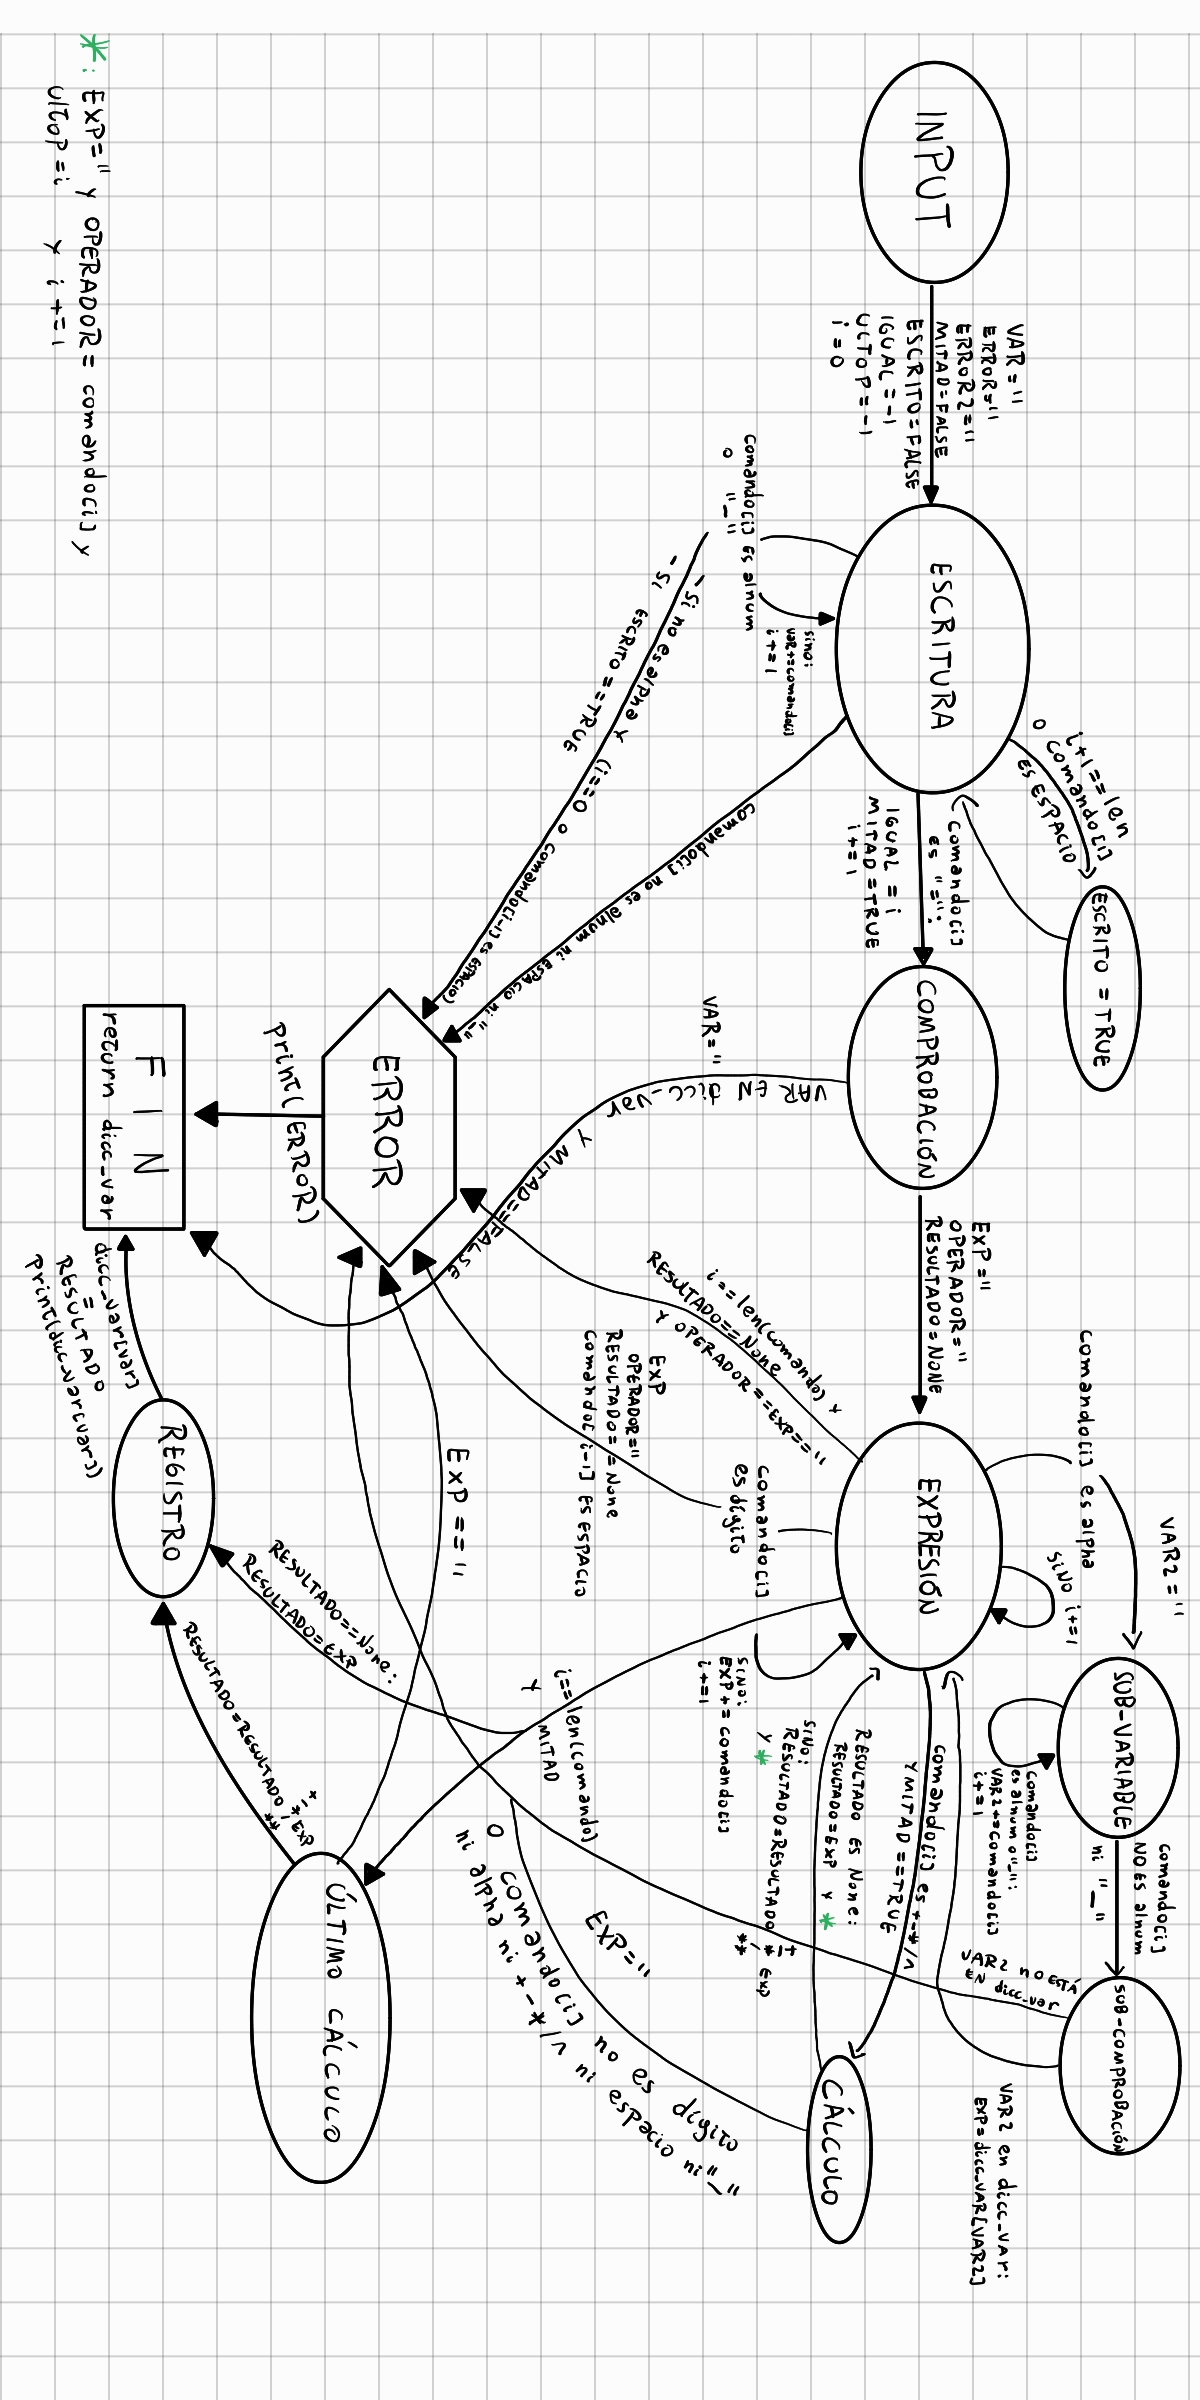

In [ ]:
# Esta función recibe un comando en string y el diccionario de variables. Con él,
# procesa el comando, imprime el resultado de la expresion
# y posiblemente modifica el diccionario. La función retorna el diccionario

def procesar_comando(comando, dicc_var): #
    var = ''
    error = ''
    error2 = ''
    mitad = False
    escrito = False
    igual = -1
    ultop = -1
    i = 0
    while i < len(comando):
        if comando[i].isalnum() or comando[i] == '_': #
          if not comando[i].isalpha(): #
            if i == 0 or comando[i-1].isspace():#
              error2 = comando[i:] #
              break #
          if escrito: #
            error2 = comando[i:] #
            break #
          var += comando[i] #
          if i+1 == len(comando): #
            escrito = True #
          elif comando[i+1].isspace(): #
            escrito = True #
        elif comando[i] == "=": #
          igual = i #
          mitad = True #
          i += 1 #
          break #
        elif not comando[i].isspace():   # or not comando[i] == '_'
            error2 = comando[i:] #
            break #
        i += 1 #
    if not var: #
      return dicc_var #
    if error2: #
            print('ERROR: al procesar "' + error2 + '"') #
            return dicc_var #
    if var in dicc_var and not mitad: #
      print(dicc_var[var]) #
      return dicc_var #
    else: #
        exp = '' #
        operador = '' #
        resultado = None #
        while i < len(comando): #
            if comando[i].isdigit(): #
              if exp and not operador and resultado == None and comando[i-1].isspace(): #
                error2 = comando[i:] #
                break #
              exp += comando[i] #
              i += 1 #
            elif comando[i].isalpha(): # o comando[i] == '_' ??
                var2 = '' #
                while i < len(comando) and (comando[i].isalnum() or comando[i] == '_'): #
                    var2 += comando[i] #
                    i += 1 #
                if var2 in dicc_var: #
                    exp += str(dicc_var[var2]) #
                else:#
                    error += var2#
                    break #
            elif comando[i] in "+-*/^" and mitad: #
              if not exp: # ( (not operador and resultado == None) or (operador and resultado) )
                error2 = comando[i:] #
                break #
              if resultado is None: #
                  resultado = int(exp) #
              else: #
                if operador == "+": #
                  resultado += int(exp) #
                elif operador == "-": #
                  resultado -= int(exp) #
                elif operador == "*": #
                  resultado *= int(exp) #
                elif operador == "/": #
                  resultado /= int(exp) #
                elif operador == "^": #
                  resultado **= int(exp) #
                #operador = ''
              exp = '' #
              operador = comando[i] #
              ultop = i #
              i += 1 #
            elif not (comando[i].isspace() or comando[i] == '_'): #
              error2 = comando[i:] #
              break #
            else: #
                i += 1 #
        if i == len(comando) and resultado == None and not operador and not exp: #
          error2 = comando[igual:] #
        if error2: #
            print('ERROR: al procesar "' + error2 + '"') #
            return dicc_var #
        if error: #
            print('ERROR: variable indefinida "' + error + '"') #
            return dicc_var #
        elif resultado is None and mitad:#
            resultado = int(exp)#
        elif mitad:
          if not exp: # and operador and resultado
            print('ERROR: al procesar "' + comando[ultop:] + '"') #
            return dicc_var  #
          elif operador == "+": #
            resultado += int(exp) #
          elif operador == "-": #
            resultado -= int(exp) #
          elif operador == "*": #
            resultado *= int(exp) #
          elif operador == "/": #
            resultado //= int(exp) #
          elif operador == "^": #
            resultado **= int(exp) #
        dicc_var[var] = resultado
        print(dicc_var[var])
        return dicc_var

def calculadora(lista_comandos):
  # Este diccionario almacena las variables que se vayan definiendo en la calculadora
  # Este diccionario se inicializa cuando se usa la calculadora
  vars = dict()

  # Se procesan todos los comandos de la lista (lista de string)
  for i in range(0, len(lista_comandos)):
    vars = procesar_comando(lista_comandos[i], vars)

dic = dict()
procesar_comando(" n = 5", dic)

5


{'n': 5}

## Ejemplo 1

In [ ]:
# EJEMPLO 1:
lista = ["n=5","hanoi=2^n-1","var_1 = 23 - 13 + hanoi * 2","h2 = hanoi /2","","n"]
calculadora(lista)

5
31
82
15
5


El resultado del ejemplo anterior debería imprimir en pantalla

   5

   31

   82

   15

   5



## Ejemplo 2

In [ ]:
# EJEMPLO 2:
lista = ["n=5","hanoi=2^n-1","var_1 = 23 - 13 + hanoi2 * 2","h2 = hanoi /2","","n"]
calculadora(lista)

5
31
ERROR: variable indefinida "hanoi2"
15
5


El resultado del ejemplo anterior debería imprimir en pantalla

5

31

ERROR: variable indefinida "hanoi2"

15

5